In [1]:
"""
This notebook generates the log L2 ref - alt plots for tiqtls (Fig. 3A).
For example track and DeepSHAP plots, please see the example tracks directory.
"""

'\nThis notebook generates the log L2 ref - alt plots for tiqtls (Fig. 3A).\nFor example track and DeepSHAP plots, please see the example tracks directory.\n'

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, gaussian_kde
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
# PRINT COMMANDS TO DOWNLOAD AND EXTRACT DATA

# Set scratch to where you want to download data to
SCRATCH = "/Users/adamhe/github/scratch"

URL = "https://zenodo.org/records/10597358/files"
TAR = "qtl_analysis.tar.gz"
print(f"wget {URL}/{TAR} -P {SCRATCH}")
print(f"tar -cvzf {SCRATCH}/{TAR}")

wget https://zenodo.org/records/10597358/files/qtl_analysis.tar.gz -P /Users/adamhe/github/scratch
tar -cvzf /Users/adamhe/github/scratch/qtl_analysis.tar.gz


In [5]:
# Load data

individual_folds = np.log10(
    pd.read_csv(os.path.join(SCRATCH, "qtl_analysis/tiqtl/individual_folds/tiqtls_l2_scores.csv.gz"), index_col=0) 
    + 1e-3
)
ensembled = np.log10(
    pd.read_csv(os.path.join(SCRATCH, "qtl_analysis/tiqtl/ensemble_predictions/tiqtls_l2_scores.csv.gz"), index_col=0) 
    + 1e-3
)
composite = pd.concat([individual_folds, ensembled.loc[~ensembled.index.isin(individual_folds.index)]])

PearsonRResult(statistic=0.4769306528870901, pvalue=2.5320316994549854e-117)

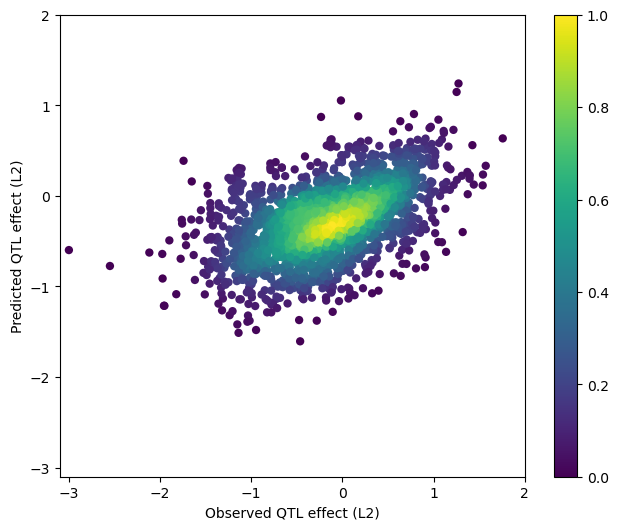

In [6]:
fig = plt.figure(figsize=(7.5, 6))
ax = fig.add_subplot(1, 1, 1)
ax = sns.scatterplot(
    data=composite,
    x="expt",
    y="pred",
    c=gaussian_kde(composite.transpose())(composite.transpose()),
    cmap="viridis",
    alpha=1,
    linewidth=0,
)
ax.set_xlabel("Observed QTL effect (L2)")
ax.set_ylabel("Predicted QTL effect (L2)")
ax.set_xlim(-3.1, 2)
ax.set_ylim(-3.1, 2)
sm = plt.cm.ScalarMappable(cmap="viridis")
ax.figure.colorbar(sm, ax=ax)
plt.savefig("img/tiqtl_composite_l2.pdf")

pearsonr(composite.expt, composite.pred)

PearsonRResult(statistic=0.5096801881197879, pvalue=2.0393999451730096e-136)

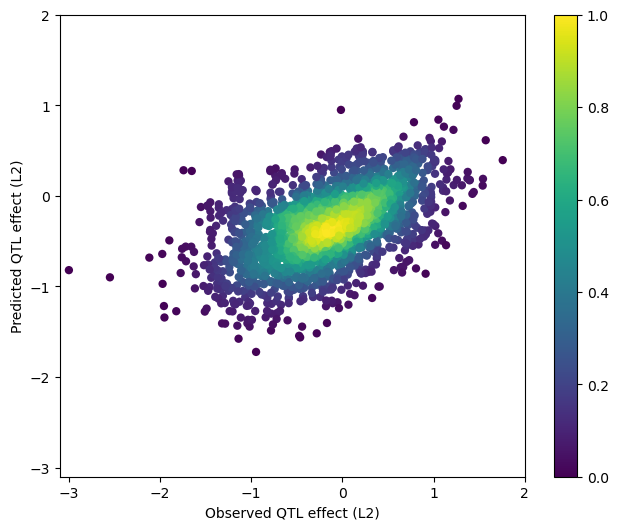

In [7]:
fig, ax = plt.subplots(figsize=(7.5, 6))
ax = sns.scatterplot(
    data=ensembled,
    x="expt",
    y="pred",
    c=gaussian_kde(ensembled.transpose())(ensembled.transpose()),
    cmap="viridis",
    alpha=1,
    linewidth=0,
)
ax.set_xlabel("Observed QTL effect (L2)")
ax.set_ylabel("Predicted QTL effect (L2)")
ax.set_xlim(-3.1, 2)
ax.set_ylim(-3.1, 2)
sm = plt.cm.ScalarMappable(cmap="viridis")
ax.figure.colorbar(sm, ax=ax)
plt.savefig("img/tiqtl_ensembled_l2.pdf")

pearsonr(ensembled.expt, ensembled.pred)